In [1]:
pip install scikit-learn==1.5.1


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
original_data = pd.read_csv("train_ctrUa4K.csv")
original_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
duplicate = original_data

In [5]:
duplicate.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
duplicate.info(), duplicate.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


(None,
 Loan_ID               0
 Gender               13
 Married               3
 Dependents           15
 Education             0
 Self_Employed        32
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount           22
 Loan_Amount_Term     14
 Credit_History       50
 Property_Area         0
 Loan_Status           0
 dtype: int64)

In [7]:
Columns = ['Loan_Amount_Term', 'Credit_History', 'Self_Employed', 'Dependents', 'Married']
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
duplicate[Columns] = imputer.fit_transform(duplicate[Columns])

In [8]:
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   614 non-null    object 
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 62.5+ KB


In [9]:
duplicate.drop(columns=['Gender'], inplace = True)

In [10]:
duplicate['LoanAmount'].fillna(value = duplicate['LoanAmount'].mean(), inplace = True)

In [11]:
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    object 
 9   Credit_History     614 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 57.7+ KB


In [12]:
duplicate['Total_Income'] = duplicate['ApplicantIncome'] + duplicate['CoapplicantIncome']

In [13]:
duplicate.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [14]:
duplicate.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace = True)

In [15]:
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           614 non-null    object 
 1   Married           614 non-null    object 
 2   Dependents        614 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     614 non-null    object 
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    object 
 7   Credit_History    614 non-null    object 
 8   Property_Area     614 non-null    object 
 9   Loan_Status       614 non-null    object 
 10  Total_Income      614 non-null    float64
dtypes: float64(2), object(9)
memory usage: 52.9+ KB


In [16]:
duplicate['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [17]:
duplicate.drop(columns=['Loan_ID'], inplace = True)

In [18]:
duplicate['Education'] = duplicate['Education'].map({'Graduate': 1,'Not Graduate': 0})
duplicate['Education'].head()

0    1
1    1
2    1
3    0
4    1
Name: Education, dtype: int64

In [19]:
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Married           614 non-null    object 
 1   Dependents        614 non-null    object 
 2   Education         614 non-null    int64  
 3   Self_Employed     614 non-null    object 
 4   LoanAmount        614 non-null    float64
 5   Loan_Amount_Term  614 non-null    object 
 6   Credit_History    614 non-null    object 
 7   Property_Area     614 non-null    object 
 8   Loan_Status       614 non-null    object 
 9   Total_Income      614 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 48.1+ KB


In [20]:
duplicate['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [21]:
duplicate['Self_Employed'] = duplicate['Self_Employed'].map({'No': 0, 'Yes': 1})
duplicate['Loan_Status'] = duplicate['Loan_Status'].map({'Y': 1, 'N': 0})
duplicate['Loan_Amount_Term'] = pd.to_numeric(duplicate['Loan_Amount_Term'])
duplicate['Property_Area'] = duplicate['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
duplicate['Credit_History'] = pd.to_numeric(duplicate['Credit_History'])
duplicate['Married'] = duplicate['Married'].map({'No': 0, 'Yes': 1})

In [22]:
duplicate.head()

,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,0,1,0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,0,128.000000,360.0,1.0,0,0,6091.0
2,1,0,1,1,66.000000,360.0,1.0,2,1,3000.0
3,1,0,0,0,120.000000,360.0,1.0,2,1,4941.0
4,0,0,1,0,141.000000,360.0,1.0,2,1,6000.0


In [23]:
duplicate['Dependents'] = duplicate['Dependents'].map({'1': 1, '0': 0, '2': 2, '3+': 3})

In [24]:
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Married           614 non-null    int64  
 1   Dependents        614 non-null    int64  
 2   Education         614 non-null    int64  
 3   Self_Employed     614 non-null    int64  
 4   LoanAmount        614 non-null    float64
 5   Loan_Amount_Term  614 non-null    float64
 6   Credit_History    614 non-null    float64
 7   Property_Area     614 non-null    int64  
 8   Loan_Status       614 non-null    int64  
 9   Total_Income      614 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 48.1 KB


In [25]:
x = duplicate.drop('Loan_Status', axis = 1)
y = duplicate['Loan_Status']

In [26]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.8)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((491, 9), (123, 9), (491,), (123,))

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(class_weight='balanced', criterion='entropy');
tree.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy')

In [28]:
train_predict = tree.predict(xtrain)
test_predict = tree.predict(xtest)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(ytrain, train_predict))
print(classification_report(ytest, test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       344

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491

              precision    recall  f1-score   support

           0       0.55      0.49      0.52        45
           1       0.72      0.77      0.75        78

    accuracy                           0.67       123
   macro avg       0.64      0.63      0.63       123
weighted avg       0.66      0.67      0.66       123



## Tuning Hyperparameters

In [29]:
from sklearn.metrics import f1_score
def calc_score(model, x1, y1, x2, y2):
    model.fit(x1, y1)
    predic = model.predict(x1)
    f1 = f1_score(y1, predic)
    predic = model.predict(x2)
    f2 = f1_score(y2, predic)
    return f1, f2

def effect(train_score, test_score, x_axis, title):
    plt.figure(figsize=(5,5), dpi = 120)
    plt.plot(x_axis, train_score, color='red', label = 'train_score')
    plt.plot(x_axis, test_score, color='blue', label = 'Test_score')
    plt.title(title)
    plt.xlabel("Parameter value")
    plt.ylabel("f1 Score")
    plt.legend()
    plt.show()

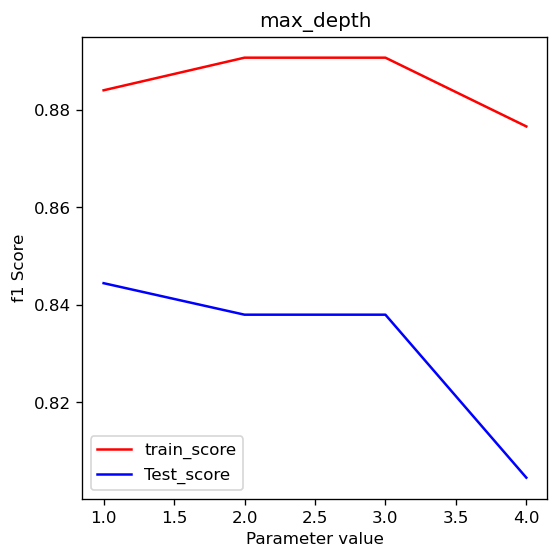

In [30]:
maxdepth = [i for i in range(1,5)]
train = []
test = []
for i in maxdepth:
    model = DecisionTreeClassifier(class_weight='balanced', max_depth=i, random_state=42)
    f1, f2 = calc_score(model, xtrain, ytrain, xtest, ytest)
    train.append(f1)
    test.append(f2)
effect(train, test, range(1,5), 'max_depth')
#max_depth = 2 gives optimum results

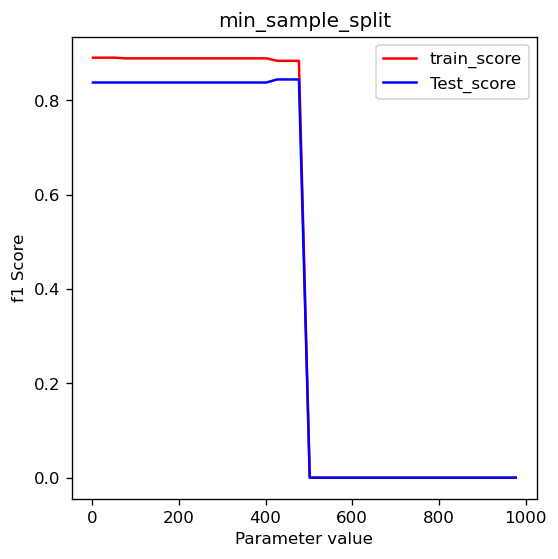

In [31]:
min_Split = [i for i in range(2,1000, 25)]
train = []
test = []
for i in min_Split:
    model = DecisionTreeClassifier(class_weight='balanced', min_samples_split=i,max_depth = 2, random_state=42)
    f1, f2 = calc_score(model, xtrain, ytrain, xtest, ytest)
    train.append(f1)
    test.append(f2)
effect(train, test, range(2,1000, 25), 'min_sample_split')

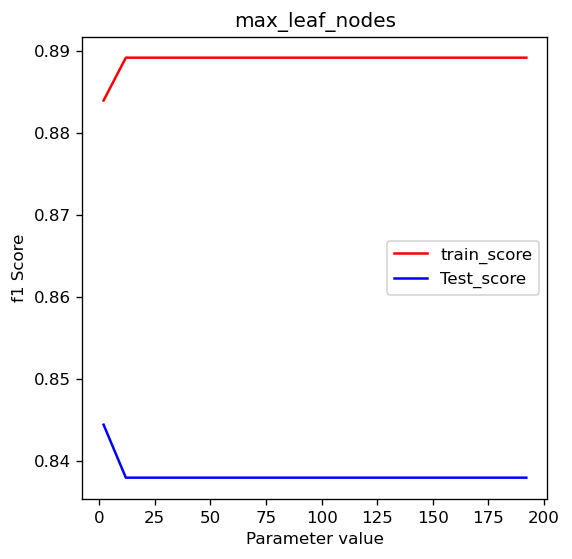

In [32]:
max_leafnode = [i for i in range(2,200, 10)]
train = []
test = []
for i in max_leafnode:
    model = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=i, min_samples_split=200, max_depth=2, random_state=42)
    f1, f2 = calc_score(model, xtrain, ytrain, xtest, ytest)
    train.append(f1)
    test.append(f2)
effect(train, test, range(2,200, 10), 'max_leaf_nodes')

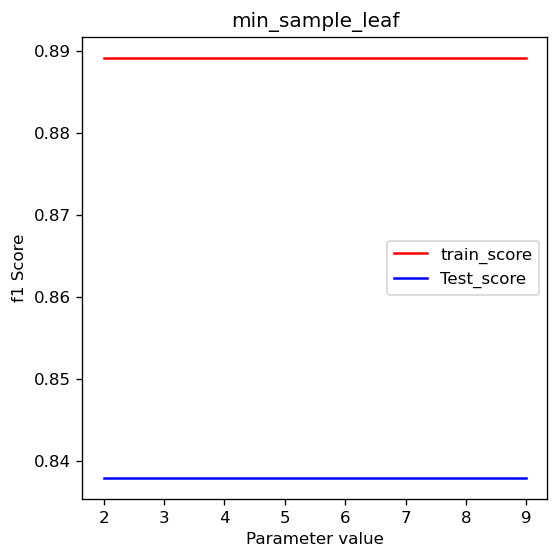

In [33]:
minsampleleaf = [i for i in range(2,10)]
train = []
test = []
for i in minsampleleaf:
    model = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', min_samples_leaf=i, max_depth=2, min_samples_split=200, max_leaf_nodes=25, random_state=42)
    f1, f2 = calc_score(model, xtrain, ytrain, xtest, ytest)
    train.append(f1)
    test.append(f2)
effect(train, test, range(2,10), 'min_sample_leaf')

In [34]:
#After tuning the parameters, we fit the model again with the desired values.
tree = DecisionTreeClassifier(criterion='gini', class_weight='balanced', max_depth=2, min_samples_split=200, min_samples_leaf = 5, max_leaf_nodes = 25)
tree.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=25,
                       min_samples_leaf=5, min_samples_split=200)

In [35]:
pred_train = tree.predict(xtrain)
pred_test = tree.predict(xtest)
accuracy_score(ytest, pred_test), accuracy_score(ytrain, pred_train)

(0.7642276422764228, 0.8289205702647657)

In [36]:
print(classification_report(pred_train, ytrain))
print(classification_report(pred_test, ytest))

              precision    recall  f1-score   support

           0       0.48      0.91      0.62        77
           1       0.98      0.81      0.89       414

    accuracy                           0.83       491
   macro avg       0.73      0.86      0.76       491
weighted avg       0.90      0.83      0.85       491

              precision    recall  f1-score   support

           0       0.42      0.86      0.57        22
           1       0.96      0.74      0.84       101

    accuracy                           0.76       123
   macro avg       0.69      0.80      0.70       123
weighted avg       0.87      0.76      0.79       123



In [37]:
import pickle 
with open('model_tree.pkl', 'wb') as f:
    pickle.dump(tree,f)